In [2]:
# Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import investpy
import talib
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('seaborn-notebook')

In [3]:
# Load data into dataframe
today = datetime.today().strftime('%d/%m/%Y')
#df = yf.download('NFLX', start='2020-01-01', end=today)
df = investpy.get_stock_historical_data(stock='NFLX',
                                        country='mexico',
                                        from_date='01/01/2020',
                                        to_date=today)
#df = investpy.get_currency_cross_recent_data(currency_cross='USD/MXN')

df.reset_index(inplace=True)

# Set the date to be the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

# Show the data
df.tail()

,Date,Open,High,Low,Close,Volume,Currency
2021-05-17,2021-05-17,9772.20,9772.2,9599.99,9649.58,881,MXN
2021-05-18,2021-05-18,9690.00,9765.0,9649.59,9670.26,647,MXN
2021-05-19,2021-05-19,9600.00,9730.0,9557.00,9698.75,339,MXN
2021-05-20,2021-05-20,9775.01,10000.0,9775.01,9949.60,3697,MXN
2021-05-21,2021-05-21,10007.00,10027.0,9940.01,9953.11,985,MXN


In [4]:
# Calculate MACD and MACD-Signal
df['macd'], df['macd_signal'], df['macd_hist'] = talib.MACD(df['Close'])
df['cci'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=20)

Text(0.5, 0, 'Fecha')

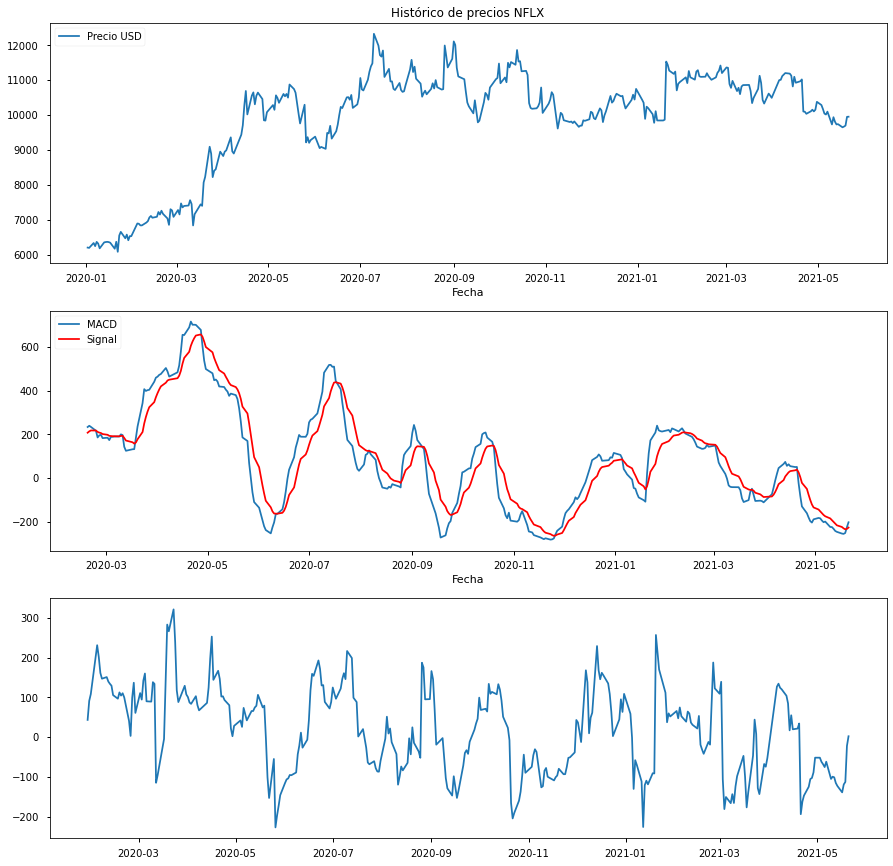

In [6]:
# Plot the stock price, macd and cci
#plt.figure(figsize=(15, 14))
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 15))

# Precios
ax1.plot(df['Close'], label='Precio USD')
ax1.set_title('Histórico de precios NFLX')
ax1.set_xlabel('Fecha')
ax1.legend(loc='upper left')

# MACD
ax2.plot(df.index, df['macd'], label='MACD')
ax2.plot(df.index, df['macd_signal'], label='Signal', color='red')
ax2.legend(loc='upper left')
ax2.set_xlabel('Fecha')

# CCI
ax3.plot(df.index, df['cci'], label='CCI')
ax2.legend(loc='upper left')
ax2.set_xlabel('Fecha')

In [11]:
# Crossing MACD the Signal
def cross(signal, macd, close):
    buy = []
    sell = []
    for i in range(len(signal)):
        if (
            not(np.isnan(macd[i - 1]))
            and not(np.isnan(signal[i - 1]))
            and (macd[i] > signal[i]) != (macd[i - 1] > signal[i - 1])
        ):
            if ((macd[i] > signal[i]), (macd[i - 1] > signal[i - 1])) == (True, False):
                buy.append(close[i-1])
                sell.append(np.nan)
            else:
                sell.append(close[i-1])
                buy.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)            
    return buy, sell

In [12]:
# Get MACD-Signal intersections
# buy, sell = intersection(df['macd_signal'], df['macd'], df['Close'])
buy, sell = cross(df['macd_signal'], df['macd'], df['Close'])
# Add buy and sell columns
df['buy'] = buy
df['sell'] = sell

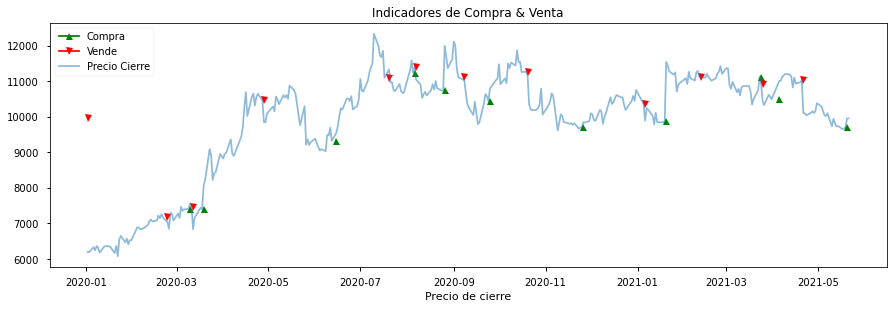

In [13]:
# Plot buy and sell signals
plt.figure(figsize=(15, 4.5))
plt.plot(df.index, df['buy'], label='Compra', color='green', marker='^', alpha=1)
plt.plot(df.index, df['sell'], label='Vende', color='red', marker='v', alpha=1)
plt.plot(df['Close'], label='Precio Cierre', alpha=0.5)

plt.title('Indicadores de Compra & Venta')
plt.xlabel('Date')
plt.xlabel('Precio de cierre')
plt.legend(loc='upper left')
plt.show()

In [12]:
buy = df['buy']
sell = df['sell']

capital = 10000.0
profit = 0
bought = False
buy_price = 0

for i in range(len(df['Close'])):
    
    if not(np.isnan(buy[i])):
        n = capital // buy[i]
        buy_price = buy[i]
        capital -= n * buy_price
        print('buy : ', buy[i])
        print('tran: ', n,'(', buy[i], ') =', n * buy_price)
        print('capi: ', capital)
        bought = True
        
    if bought and not(np.isnan(sell[i])):
        #profit += sell[i] - buy_price
        capital += n * sell[i]
        print('sell: ', sell[i])
        print('tran: ', n,'(', sell[i], ') =', n * sell[i])
        print('capi: ', capital)
        print('---------------')
        buy_price = 0
        bought = False

profit

buy :  1656.92
tran:  6.0 ( 1656.92 ) = 9941.52
capi:  58.47999999999956
sell:  1769.68
tran:  6.0 ( 1769.68 ) = 10618.08
capi:  10676.56
---------------
buy :  1776.0
tran:  6.0 ( 1776.0 ) = 10656.0
capi:  20.55999999999949
sell:  1585.3
tran:  6.0 ( 1585.3 ) = 9511.8
capi:  9532.359999999999
---------------
buy :  1711.98
tran:  5.0 ( 1711.98 ) = 8559.9
capi:  972.4599999999991
sell:  1715.6
tran:  5.0 ( 1715.6 ) = 8578.0
capi:  9550.46
---------------
buy :  1755.3
tran:  5.0 ( 1755.3 ) = 8776.5
capi:  773.9599999999991
sell:  1868.08
tran:  5.0 ( 1868.08 ) = 9340.4
capi:  10114.359999999999
---------------
buy :  1979.13
tran:  5.0 ( 1979.13 ) = 9895.650000000001
capi:  218.7099999999973
sell:  1902.29
tran:  5.0 ( 1902.29 ) = 9511.45
capi:  9730.159999999998
---------------
buy :  2212.78
tran:  4.0 ( 2212.78 ) = 8851.12
capi:  879.0399999999972
sell:  2315.14
tran:  4.0 ( 2315.14 ) = 9260.56
capi:  10139.599999999997
---------------
buy :  2554.36
tran:  3.0 ( 2554.36 ) = 7663.08

0

In [146]:
df.to_csv('data/nflx_analysis.csv')

In [7]:
df[-1:]

,Date,Open,High,Low,Close,Volume,Currency,macd,macd_signal,macd_hist,cci,buy,sell
2021-05-19,2021-05-19,93.48,97.51,92.76,96.55,14793331,USD,-3.888507,-5.112782,1.224274,10.167716,NaN,NaN
